# Rad 116ers - Assignment 04: Cluster Analysis, ANN, Text Mining
Pre-requisites and libraries used: <br>
Python 3<br>
pandas<br>
matplotlib<br>
scikit-learn<br>
scipy<br>
sklearn<br>
Jupyter Notebook<br>

## Member Assignments
### Fernando Mendez: ANN


### Ethan Tecson: Written Report, Merging


### Joshua Langley: Text Mining


### Calvin Chen: Clustering Analysis


### Seungjin Chae:


### Daniel Chu:


### Ryan Sario: Written Report


### Sukhdeep Banwait:

# Clustering Analysis


Reading dataset and doing some data preprocessing, clustering, and classification


In [ ]:
import os
import warnings
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

os.environ['OMP_NUM_THREADS'] = '3'

data = pd.read_csv('imdb_dataset.csv')

# choosing features
data.dropna(subset=['genre', 'runtime', 'imdb_rating', 'critics_score', 'audience_score'], inplace=True)

# preprocessing the data
features = data[['genre', 'runtime', 'imdb_rating', 'critics_score', 'audience_score']].copy()
features['genre'] = LabelEncoder().fit_transform(features['genre'])
X = StandardScaler().fit_transform(features)

# putting into 3 clusters
kmeans = KMeans(n_clusters=3, n_init=10, random_state=1)
data['cluster'] = kmeans.fit_predict(X)

# Classification: Predict high or low imdb_rating
data['high_rating'] = (data['imdb_rating'] > data['imdb_rating'].median()).astype(int)
X = data[['runtime', 'critics_score', 'audience_score', 'cluster']]
y = data['high_rating']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# logistic regression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print("Classification Accuracy:", accuracy)
warnings.filterwarnings('ignore')

Classification Accuracy: 0.9230769230769231


### KMeans
Performing KMeans by plotting the SSE vs Number of Clusters (Elbow Method)

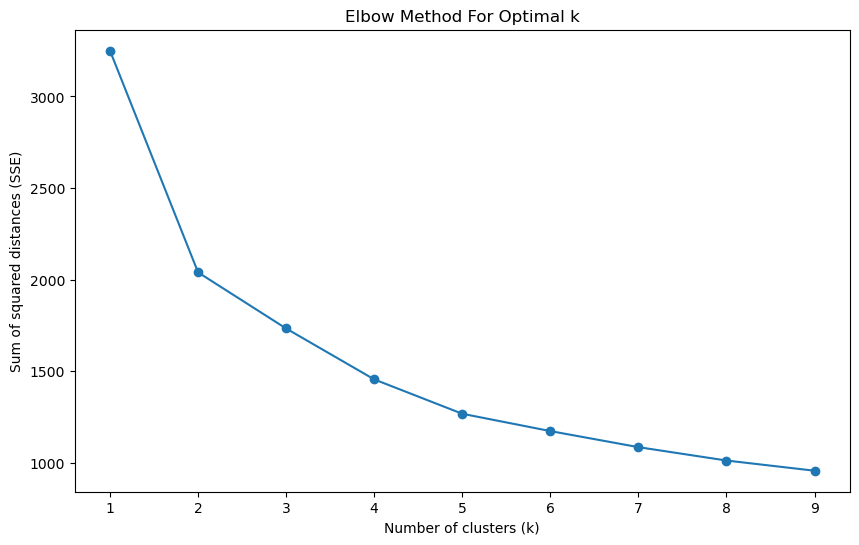

In [ ]:
# elbow method
sse = []
list_k = list(range(1, 10))
for k in list_k:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(new_data)
    sse.append(kmeans.inertia_)

# Plotting the results of the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSE)')
plt.title('Elbow Method For Optimal k')
plt.show()

### Hierarchical
Building Hierarchical clusters by using single, complete, and average linking methods

Single Linkage

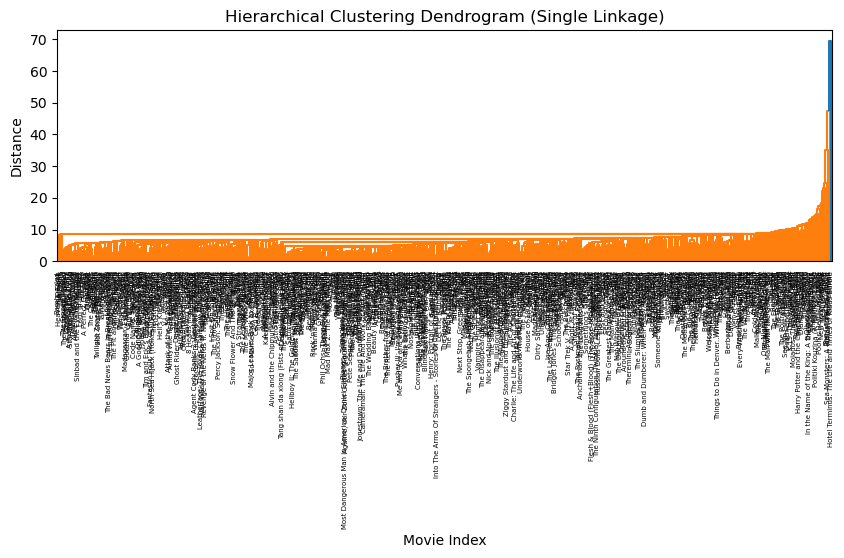

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X, method='single')

plt.figure(figsize=(10, 3))
dendrogram(
    linked,
    orientation='top',
    labels=data['title'].values,
    distance_sort='descending',
    show_leaf_counts=True
)
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Movie Index')
plt.ylabel('Distance')
plt.show()

Complete Linkage

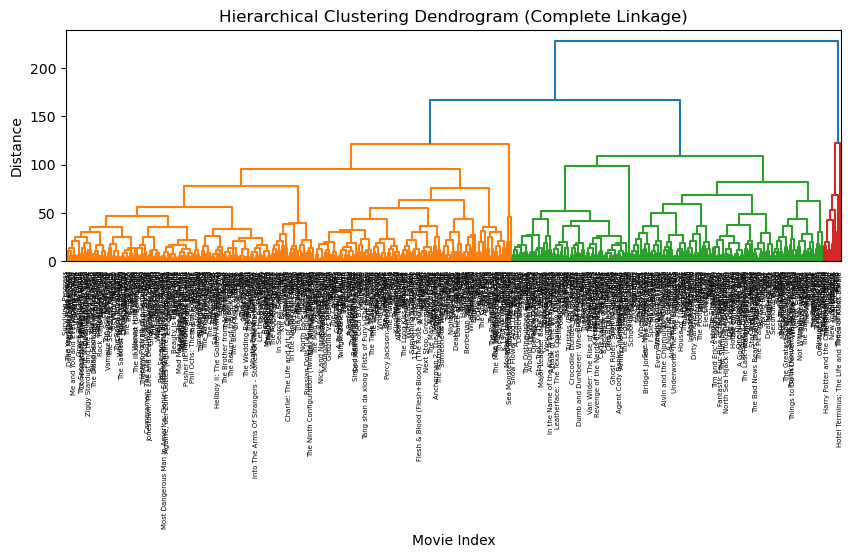

In [ ]:
linked = linkage(X, method='complete')

plt.figure(figsize=(10, 3))
dendrogram(
    linked,
    orientation='top',
    labels=data['title'].values,
    distance_sort='descending',
    show_leaf_counts=True
)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Movie Index')
plt.ylabel('Distance')
plt.show()

Average Linkage

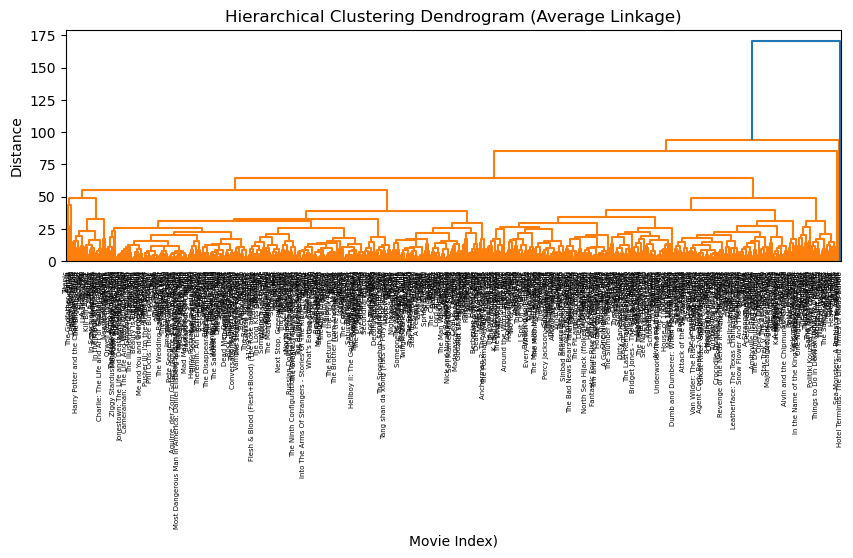

In [ ]:
linked = linkage(X, method='average')

plt.figure(figsize=(10, 3))
dendrogram(
    linked,
    orientation='top',
    labels=data['title'].values,
    distance_sort='descending',
    show_leaf_counts=True
)
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Movie Index)')
plt.ylabel('Distance')
plt.show()

Part 2: Text Mining

In [ ]:
# Load the dataset to be used.
dataset = [ 'Now for manners use has company believe parlors.',
'Least nor party who wrote while did. Excuse formed as is agreed admire so on result parish.',
'Put use set uncommonly announcing and travelling. Allowance sweetness direction to as necessary.',
'Principle oh explained excellent do my suspected conveying in.',
'Excellent you did therefore perfectly supposing described. ',
'Its had resolving otherwise she contented therefore.',
'Afford relied warmth out sir hearts sister use garden.',
'Men day warmth formed admire former simple.',
'Humanity declared vicinity continue supplied no an. He hastened am no property exercise of. ' ,
'Dissimilar comparison no terminated devonshire no literature on. Say most yet head room such just easy. ']
print(dataset)

['Now for manners use has company believe parlors.', 'Least nor party who wrote while did. Excuse formed as is agreed admire so on result parish.', 'Put use set uncommonly announcing and travelling. Allowance sweetness direction to as necessary.', 'Principle oh explained excellent do my suspected conveying in.', 'Excellent you did therefore perfectly supposing described. ', 'Its had resolving otherwise she contented therefore.', 'Afford relied warmth out sir hearts sister use garden.', 'Men day warmth formed admire former simple.', 'Humanity declared vicinity continue supplied no an. He hastened am no property exercise of. ', 'Dissimilar comparison no terminated devonshire no literature on. Say most yet head room such just easy. ']


In [ ]:
import sklearn.feature_extraction.text as sk_text

vectorizer = sk_text.CountVectorizer(min_df=1)
#vectorizer = sk_text.CountVectorizer(stop_words = 'english')

#min_df: ignore terms that have a document frequency < min_df.

matrix = vectorizer.fit_transform(dataset)

print(type(matrix))          # Compressed Sparse Row matrix
print(matrix.toarray())        #  convert it to numpy array

print(vectorizer.get_feature_names_out()) #get_feature_names was discontinued and replaced with get_feature_names_out

<class 'scipy.sparse._csr.csr_matrix'>
[[0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0

In [ ]:
vectorizer = sk_text.TfidfVectorizer(
                             #stop_words='english',
                             #max_features = 1000,
                             min_df=1)


#max_features:  build a vocabulary that only consider the top max_features features ordered by term frequency across the corpus.

matrix = vectorizer.fit_transform(dataset)

print(type(matrix))          # Compressed Sparse Row matrix
print(matrix.toarray())        #  convert it to numpy array

print(vectorizer.get_feature_names_out())

<class 'scipy.sparse._csr.csr_matrix'>
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.36386176 0.36386176 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.36386176 0.
  0.         0.         0.         0.36386176 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.36386176 0.         0.
  0.         0.         0.         0.         0.36386176 0.
  0.         0.         0.         0.         0.         0.36386176
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.27061472 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.21

Part 3. ANN


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, Binarizer
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv("imdb_dataset.csv")


X = data.drop(columns=['mpaa_rating'])
y = data['mpaa_rating']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns


imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X[numeric_features])


Binarize numerical features
and scale numerical features to [0,1] with MinMaxScaler()

In [ ]:

binarizer = Binarizer(threshold=0.5)  # Adjust threshold as needed
X_numeric_binarized = binarizer.fit_transform(X_imputed)
X_numeric_binarized = pd.DataFrame(X_numeric_binarized, columns=numeric_features)

# Combine binarized
X_processed = pd.concat([X_numeric_binarized, X.select_dtypes(include=['object'])], axis=1)

numeric_transformer = MinMaxScaler()


In [ ]:
# One-hot encode
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

X_preprocessed = preprocessor.fit_transform(X_processed)

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Artificial Neural Network
clf = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='adam', max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

MLPClassifier(activation='logistic', max_iter=1000, random_state=42)

In [ ]:
# Preditcions
y_pred = clf.predict(X_test)

# Gets accuracy and Report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.4961832061068702
Classification Report:
               precision    recall  f1-score   support

           G       0.00      0.00      0.00         7
          PG       0.00      0.00      0.00        25
       PG-13       0.33      0.07      0.12        28
           R       0.49      0.97      0.65        59
     Unrated       0.86      0.50      0.63        12

    accuracy                           0.50       131
   macro avg       0.34      0.31      0.28       131
weighted avg       0.37      0.50      0.38       131



c:\Users\ferna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ferna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ferna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Written Report

### Overview
In this project, our group used a file that contained movie rating data (imdb_dataset.csv) and applied data science techniques to it, specifically Cluster Analysis, Artificial Neural Networks (ANN), and Text Mining to uncover some advanced data from the dataset.

### Techonologies & Techniques
We used Python along with these libraries: pandas, matplotlib, scikit-learn, scipy, sklearn. Each of this libraries were used extensively with the following three techniques.

### Cluster Analysis
After preprocessing the data, we used KMeans and Hierarchical clustering to analyze data within the movie reviews. Specifically, we compared movie ratings. By utilizing the Elbow Method during KMeans to find the optimal amount of clusters and building Dendrograms with Hierarchical clustering, we are able to get a clear overview of different type of review weighting.

### Text Mining
Given the dataset, we were able to analyze created vectors to identify key words and phrases in the movie reviews.

### Artificial Neural Networks
We used ANN to design a model, specifically using MLPCLassifier to clas movies based on their Movie MPAA ratings. We ran an Accuracy and classification report on the data to classify movie ratings.

### Results
We ran a series of tests on the IMDB movie dataset to gather meaningful data, such as movie review rating, common movie review phrases, and trained a model to predict movie ratings.

### Conclusion
After analyzing the dataset, we can conclude several things based on the techniques we utilized. First off, the Cluster Analysis helped group our dataset into several clusters based on similarity. Next, text mining give us interesting insight to key words from movie reviews. Last off, ANN developed a model to predict movie ratings. All of these techniques helped us extract meaningful data that can be adjusted accordingly.


